Introduction:

In this project, I am analysing customers who are churning (i.e., cancelling their subscription with the firm) from a top e-commerce company's dataset in order to develop a churn prediction model.

Goal:

• Construct a churn prediction model that makes accurate predictions about which customers will leave your business and which will stay. The organisation may then use this information to take preventative measures to keep these clients and lower the churn rate.

• Run an in-depth exploratory study of the given client data to learn more about their habits and preferences. This entails looking for generalisations and trends in data. The results of this study may be used to gain a deeper understanding of the company's clientele and to guide strategic planning.

Features:

CustomerID: Individual client ID
Churn: Churn Flag
Tenure: Tenure of the client inside the company
PreferredLoginDevice: Preferred device of client login
CityTier: Tier city
WarehouseToHome: The distance from the warehouse to the customer's residence
PreferredPaymentMode: Customer's preferred form of payment
Gender: Gender of the client
HourSpendOnApp: Hours spent using mobile applications or websites
NumberOfDeviceRegistered: Total number of devices of a certain consumer are recorded
PreferedOrderCat: Customer's preferred order category from the previous month
SatisfactionScore: Customer satisfaction rating for the service
MaritalStatus: Marital status of customer
NumberOfAddress: Total number of additional additions for a certain client
OrderAmountHikeFromlastYear: Ordered percentage gains from the previous year
CouponUsed: The total number of coupons utilised in the previous month
OrderCount: The total amount of orders placed throughout the last month
DaySinceLastOrder: Day since the customer's previous purchase
CashbackAmount: Average cashback for the previous month

Project Plan

• Overview of Dataset
Take some time to read through the available customer data and get acquainted with the variables and how they are organised.
Verify the completeness of the data and look for any discrepancies or missing numbers.
Find out if any pre-processing of the data is required.

• Preliminary Analysis of Data
Find anomalies by examining the variables' distributions.
Look for patterns and correlations by probing the interplay of different factors.
Create a data visualisation to better understand your customers' habits and personas.

• Pre-Processing
Deal with missing values, transform variables to suitable data types, and fix any other problems with the data to make it usable.
Determine which variables are most crucial to including in the model you're developing.

• ML Modelling
Create a model that can foresee which clients are most likely to cancel their service.


Coding

In [1]:
#Imporing all required libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Data loading from an excel sheet and overviewing the primary data

df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [6]:
# Creating columns to list

columns = df.columns.to_list()
columns

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [7]:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [8]:
df.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

In [9]:
# Showing the unique values on each column

for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Male      3384
Female    2246
Name: Gender, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile             

In [10]:
df.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [11]:
# Transposing df's stats. Show mean as bars and color gradient for std, median, and max.

df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

In [12]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64
________________________________________________________________________________
WarehouseToHome : [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     27

In [13]:
# Merging phone and mobile in one because they are the same

df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [14]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [15]:
# As COD is Cash on Delivery and CC is Credit Card so merging them

df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [16]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [17]:
# converting num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [18]:
# Categorical columns after conversion 

df2.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

In [19]:
# Numerical columns after conversion

df2.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

In [20]:
df.duplicated().sum()

0

In [21]:
# Creating the sum of null values

grouped_data = []
for col in columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Group by 'col', 'n_missing', and 'percentage'
result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
CustomerID                   0          0.000000      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000     

In [22]:
import sweetviz as sv

# Generate the report
report = sv.analyze(df)

# Show the report in a Jupyter notebook
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


EDA (Exploratory Data Analysis)

Here are some business questions can be asked.

1. Does churn and gender have a connection? What Gender Has the Most Orders?
2. Which martial status has the highest rate of turnover?
3. Which CityTier has a larger OrderCount and Tenure?
4. Does a customer with a high satisfaction rating spend a lot of time on the app?
5. Is there a relationship between HourSpendOnApp and SatisfactionScore?
6. What CityTier's HourSpendOnApp is the highest?
7. What connection exists between CityTier and NumberOfAddress in the churn segment?
8. How are complaints and days since last order related?
9. Does PreferredLoginDevice have any connection to Churn?
10. How far is it from a warehouse to a customer's home in a different city tier?
11. Are there distinct preferred items throughout the CityTiers?
12. What type of payment method does each CityTier prefer?
13. Which CityTier's OrderCount is the highest?
14. Does the order amount's percentage rise from the previous year have an impact on churn rate?
15. How are complaints and days since last order related?
16. What is the ordercount for users who spend a lot of time on the app?
17. Does the selected order category influence the turnover rate?
18. Do patrons who used more coupons have reduced rates of churn?
19. Is there a relationship between the quantity of orders placed in the previous month and the satisfaction score?
20. Do order counts inside churn and CashbackAmount have a relationship?
21. Are unhappy consumers more inclined to leave?

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

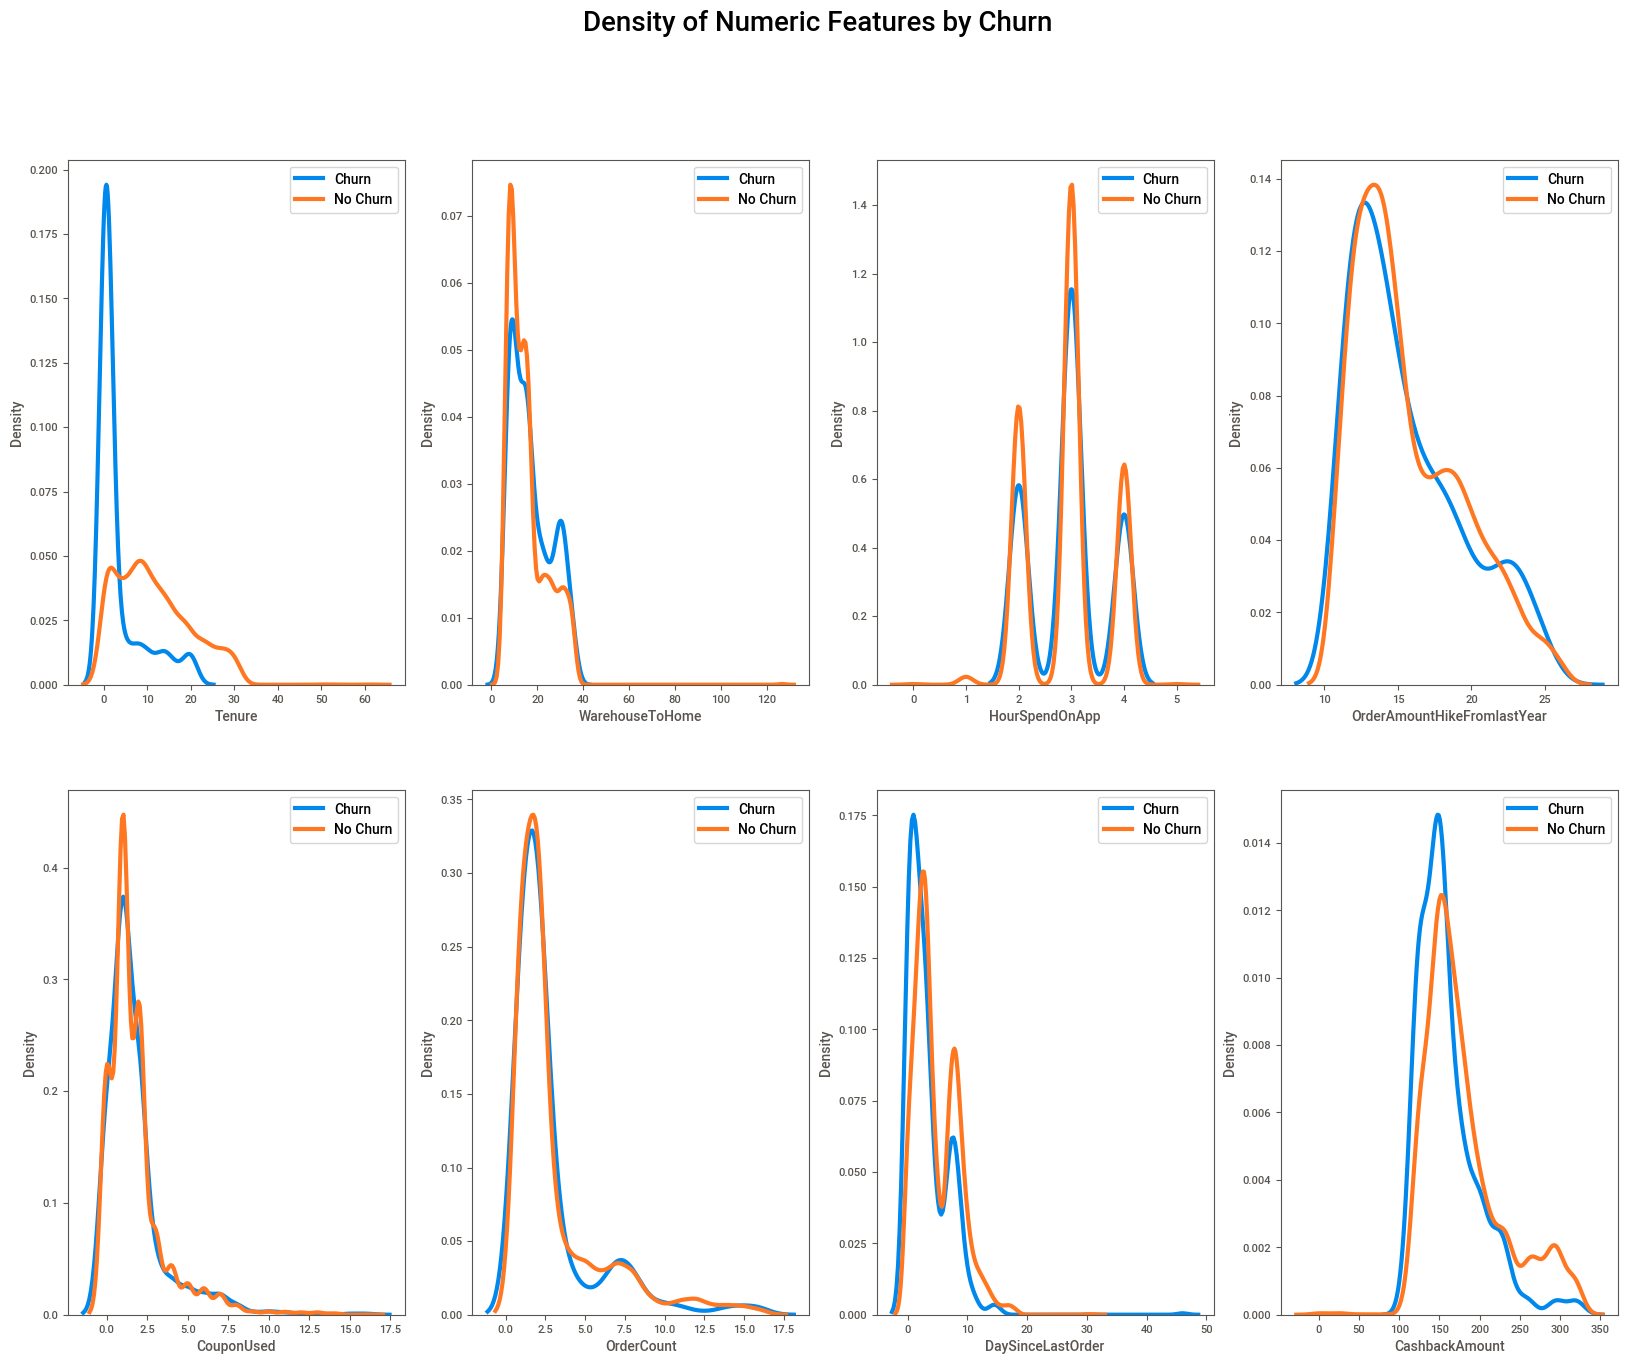

In [24]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

Distributions Insights Of the Numeric Features

Longer-tenured clients appear to be less inclined to turnover. Understandable because a longer stay suggests satisfaction.
Churn rate appears to be consistent across levels for CityTier. City tier does not appear to be a factor in churn.
WarehouseToHome: A lower churn rate is associated with closer warehouses to homes. Deliveries made more quickly could increase satisfaction.
HourSpendOnApp: Longer app usage is associated with lower churn. Engagement with an app is positive.
More registered devices are associated with reduced churn in terms of NumberOfDeviceRegistered. Convenience is increased by access across devices.
Higher satisfaction scores closely correlate with lesser churn, as would be predicted. driving force.
NumberOfAddress: There is a slight decline in churn as the number of addresses rises. Loyalty is indicated by more addresses.
More complaints are linked to increased churn, but the connection isn't very strong. Remarks reduce satisfaction.
Big spenders from last year are less likely to churn, according to OrderAmountHikeFromLastYear. good to keep major clients.
CouponUsed: The use of coupons is associated with lesser churn. Coupons increase allegiance.
OrderCount: Lower churn is associated with higher order counts. Regular use creates habits.
DaySinceLastOrder: A longer time period since the last order is associated with greater churn. A excellent predictor is recent events.

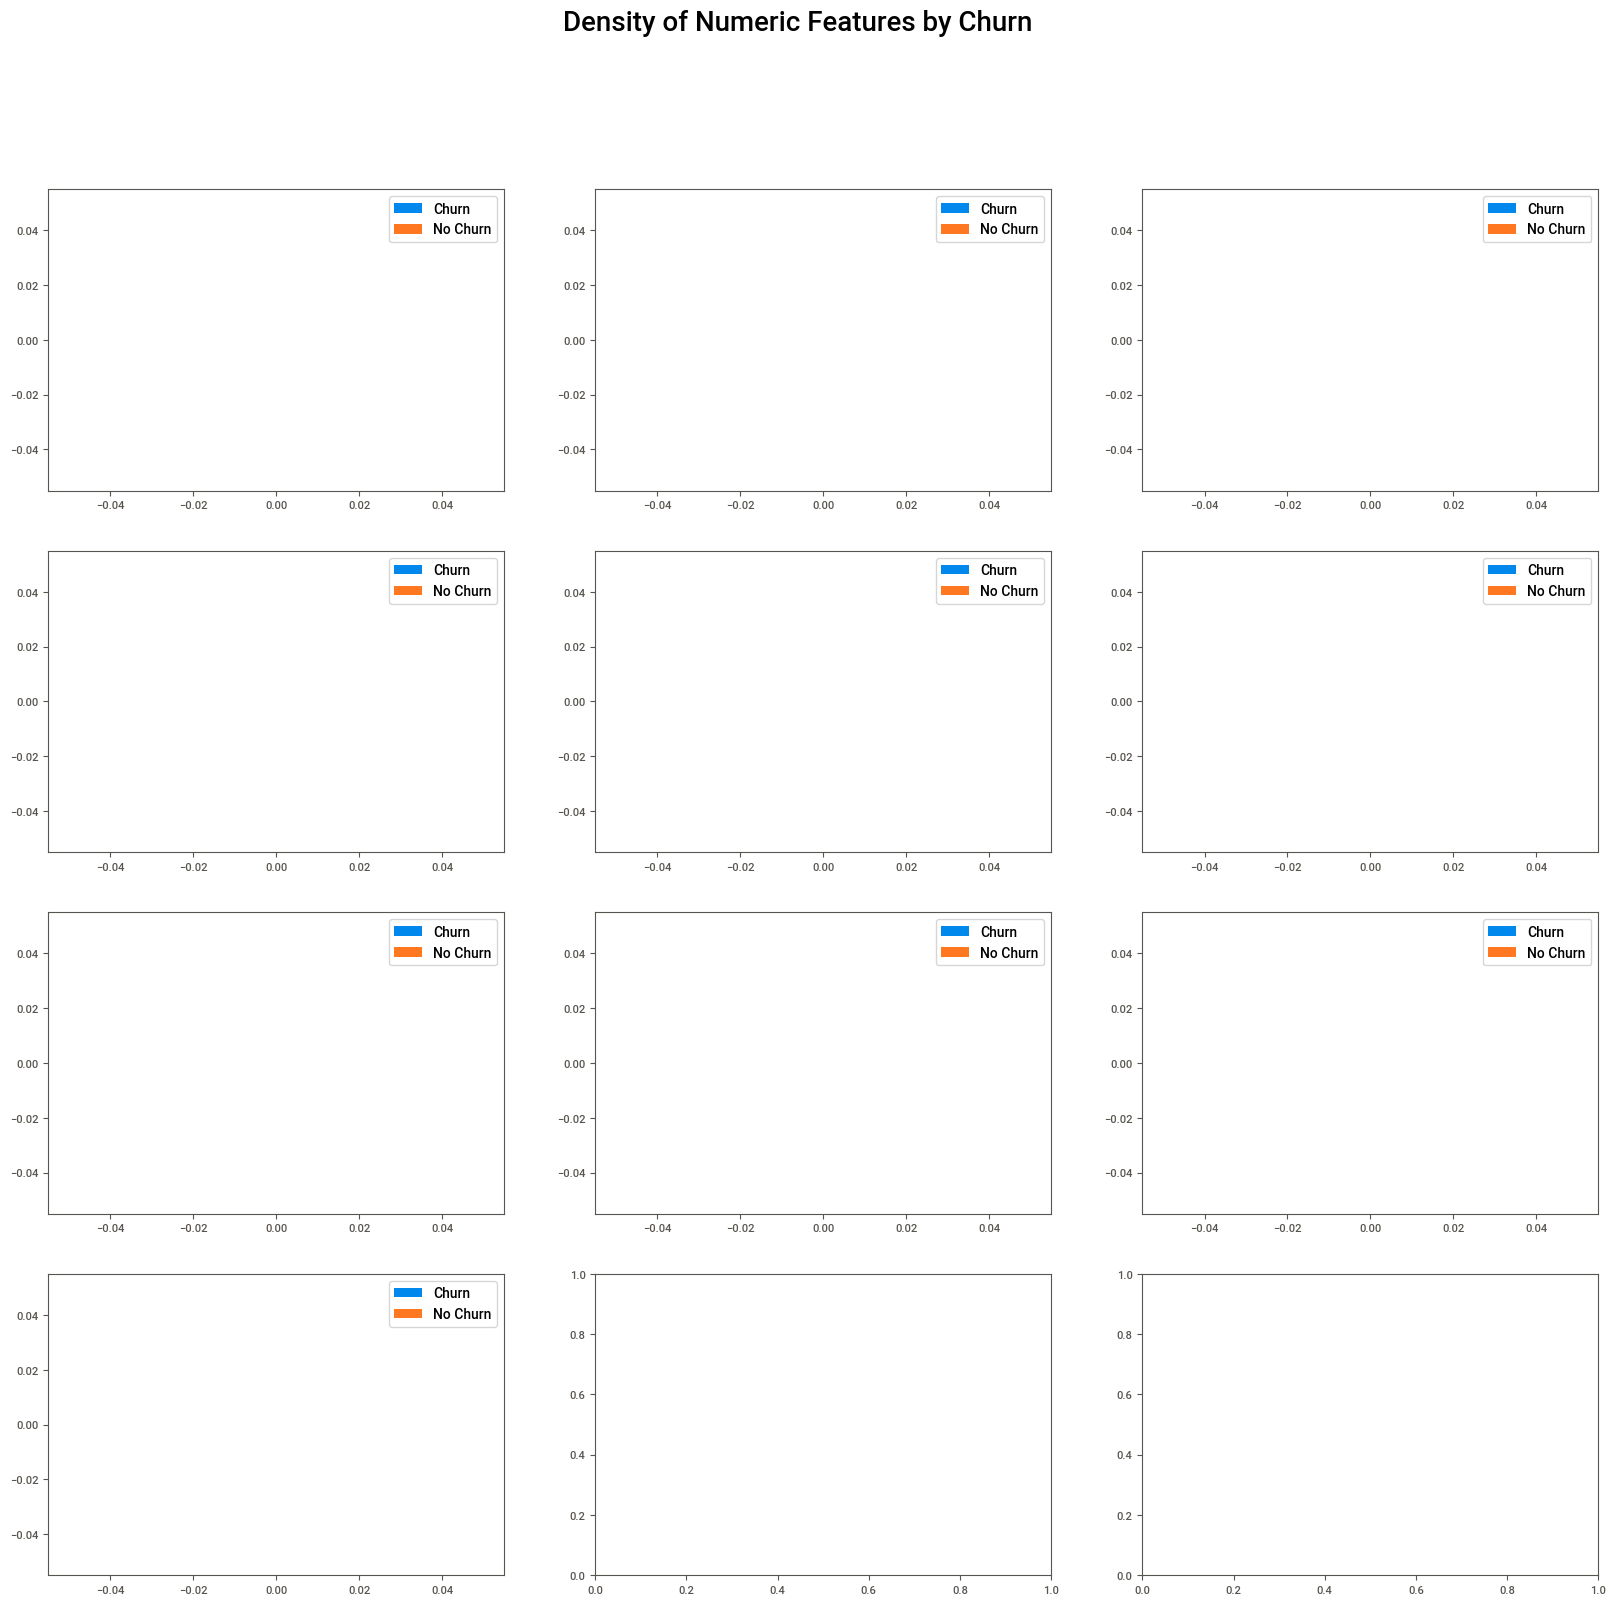

In [25]:
df2 = df.copy()

df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols):
    sns.histplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.histplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

In [26]:
# creating some color palettes for vizualizations

pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']

1-Is there a relationship between Gender and Churn? & Which Gender has more Orders?

In [27]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [28]:
df.groupby("Churn")["Gender"].value_counts()

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: Gender, dtype: int64

In [29]:
df.groupby("PreferredLoginDevice")["OrderCount"].value_counts()

PreferredLoginDevice  OrderCount
Computer              2.0            573
                      1.0            486
                      3.0            132
                      4.0             61
                      7.0             59
                      5.0             48
                      8.0             44
                      6.0             40
                      14.0            20
                      9.0             19
                      11.0            16
                      10.0            15
                      12.0            15
                      13.0             9
                      15.0             8
                      16.0             4
Mobile Phone          2.0           1452
                      1.0           1265
                      3.0            239
                      7.0            147
                      4.0            143
                      5.0            133
                      8.0            128
                      6.

<AxesSubplot: xlabel='Gender'>

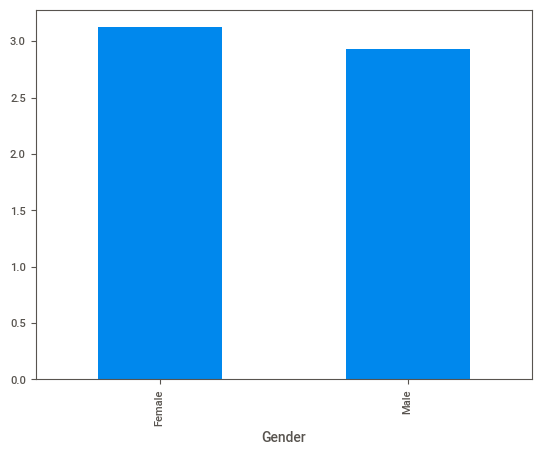

In [30]:
gender_orders = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')

gender_orders

In [31]:
percentageM =600/3384 * 100

percentageM

17.73049645390071

In [32]:
percentageF =348/2246 * 100

percentageF

15.49421193232413

In [33]:
import pandas as pd
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()

It appears that men are more likely to cancel their subscriptions to the app than women are; 63.3% of men have left the service. This suggests that the company would benefit from focusing more on things that appeal to men.

2-Which MartialStatus has the highest Churn rate?

In [34]:
df.groupby("Churn")["MaritalStatus"].value_counts()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: MaritalStatus, dtype: int64

Text(0, 0.5, 'Churn Rate')

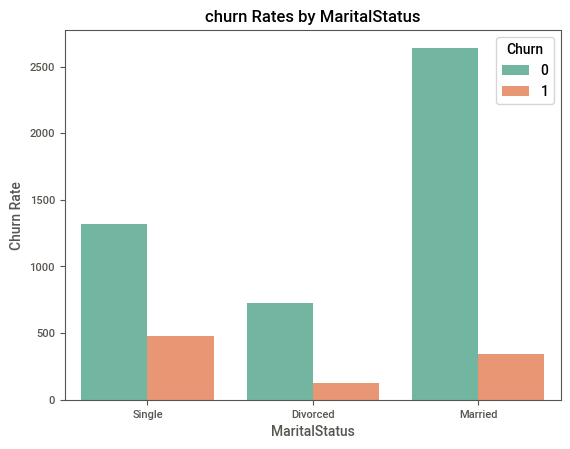

In [35]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

The married are the highest customer segment in the comapny may be the comapny should consider taking care of the products that suits the single and the married customers as the singles are the most likely to churn from the app.

3-Which CityTier has higher Tenure and OrderCount?

In [36]:
df_grouped_tenure = df.groupby('CityTier')['Tenure'].agg(['mean', 'max'])
df_grouped_tenure

mean   max
CityTier                 
1         10.528818  51.0
2         11.169725  31.0
3          9.361740  61.0

In [37]:
df_grouped_OrderCount = df.groupby('CityTier')['OrderCount'].agg(['mean', 'max'])
df_grouped_OrderCount

mean   max
CityTier                
1         2.953255  16.0
2         2.584034  13.0
3         3.185185  16.0

In [38]:
df.groupby("CityTier")["OrderCount"].mean()

CityTier
1    2.953255
2    2.584034
3    3.185185
Name: OrderCount, dtype: float64

Citytier 3 has the highest order avg but it not to be a strong factor in the customer churning

4 - Is Customer with High SatisfactionScore have high HourSpendOnApp?

In [39]:
df['SatisfactionScore'].dtypes

dtype('int64')

In [40]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df2, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()

As we see people with less satisfaction score spend less time on the app than the people of satisfaction score 5 but also i do not think there is any realation between the satisfaction score and people's spent time on the app.

5-Which CityTier has the most HourSpendOnApp?

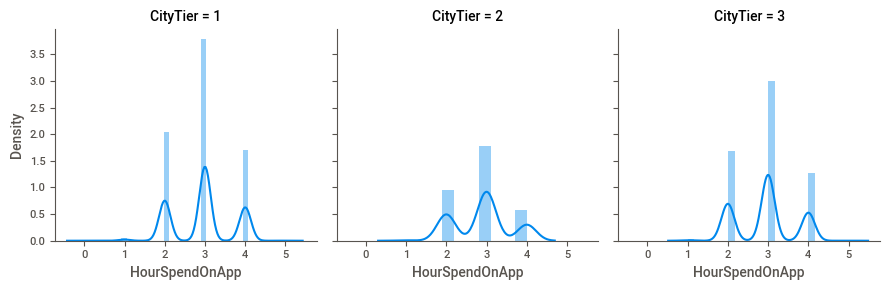

In [41]:
g = sns.FacetGrid(df, col='CityTier')
g.map(sns.distplot, 'HourSpendOnApp')

City tier 1 has the most spended hours on the app.

6 - What is the relation between NumberOfAddress and CityTier within the churn segment?

In [42]:
df.groupby("CityTier")["NumberOfAddress"].value_counts()

CityTier  NumberOfAddress
1         2                  871
          3                  832
          4                  397
          5                  377
          6                  247
          1                  228
          8                  187
          7                  173
          9                  150
          10                 129
          11                  71
          19                   1
          20                   1
          21                   1
          22                   1
2         2                   61
          3                   43
          5                   30
          1                   23
          6                   21
          4                   16
          10                  13
          7                   10
          8                   10
          11                   9
          9                    6
3         2                  437
          3                  403
          4                  175
          5      

<AxesSubplot: xlabel='CityTier', ylabel='NumberOfAddress'>

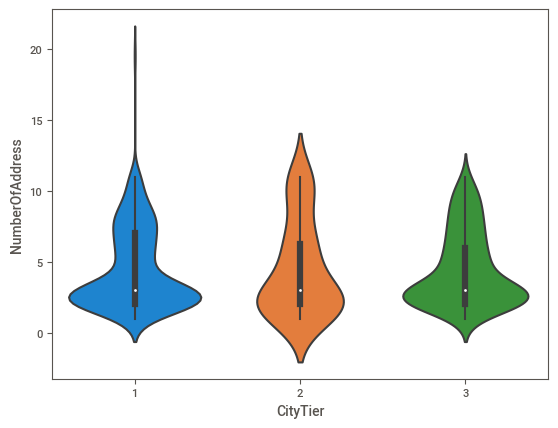

In [43]:
import seaborn as sns
sns.violinplot(x='CityTier', y='NumberOfAddress', data=df[df['Churn']==1])

City tier and address count are inversely related. The average number of addresses decreases as the CityTier increases, and the distribution becomes more concentrated. Customers in CityTier 1 cities often have more addresses than those in CityTier 2 and 3 cities. The correlation between address density and location type (metro vs. smaller cities vs. towns) implies that population density has an effect on the number of addresses customers have.

7 - What is the relation between Complain and DaySinceLastOrder?

In [44]:
df[['DaySinceLastOrder', 'Complain']].corr()

DaySinceLastOrder  Complain
DaySinceLastOrder           1.000000 -0.043546
Complain                   -0.043546  1.000000

In [45]:
import plotly.express as px

fig = px.scatter(df, x='DaySinceLastOrder', y='Complain', facet_col='Churn')
fig.update_layout(hovermode='closest')
fig.show()

There is a weak negative relation between complainig and the number of dayes since last order.

8-Is there a relationship between PreferredLoginDevice and churn?

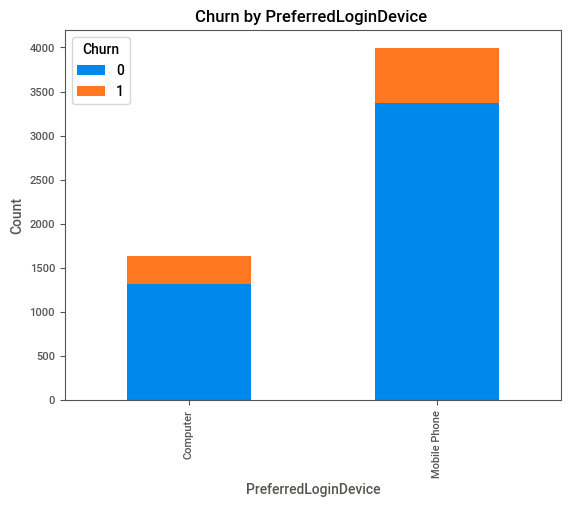

In [46]:
# Bar chart with churn rate
import seaborn as sns
# sns.catplot(x='PreferredLoginDevice', y='Churn', data=df, kind='bar')

# Group the data by 'OverTime' and 'Attrition', and calculate the count
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Show the plot
plt.show()

Mobile phone users are likely to churn may be this indicates a problem on the app user experience on the app mobile version.

9 - What is distancebetween warehosue to customer house in different city tier?

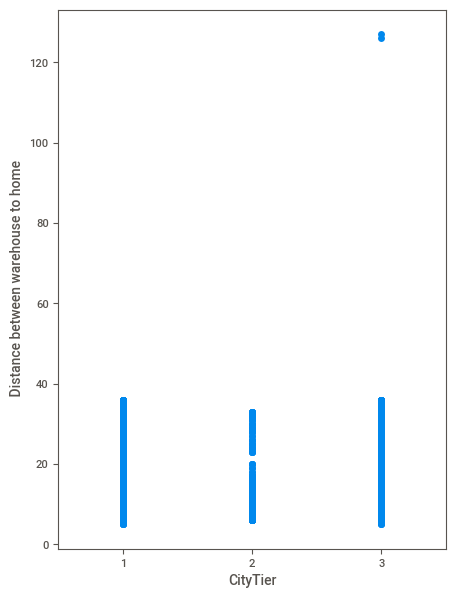

In [47]:
df3 = df.copy()

df3['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df3, jitter = False)
plt.ylabel(' Distance between warehouse to home');

Inference: As the distance from warehouse to home is similar in all city tier which means company had build warehouse in lower city tier also.

10 - Does different citytiers has different prefered products?

In [48]:
import plotly.express as px
earth_palette = ["#A67C52", "#8F704D", "#B09B71", "#7E786E"]


fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

Laptop & accesories and mobile phones are the prefered category for all the city tiers.

11- What is the preferred payment mode for different CityTiers?

In [49]:
df2['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [50]:
df2.groupby('CityTier')[['PreferredPaymentMode']].value_counts()

CityTier  PreferredPaymentMode
1         Debit Card              1676
          Credit Card             1382
          Cash on Delivery         366
          UPI                      242
2         UPI                      114
          Debit Card                62
          Credit Card               50
          Cash on Delivery          16
3         E wallet                 614
          Debit Card               576
          Credit Card              342
          Cash on Delivery         132
          UPI                       58
dtype: int64

In [51]:
import plotly.express as px

fig=px.histogram(df2,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",color_discrete_sequence=red_palette,text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

preferred payment method for CityTier '1' ==> DebitCard
preferred payment method for CityTier '2' ==> UPI
preferred payment method for CityTier '3' ==> E wallet

12-Which CityTier has the highest OrderCount?

In [52]:
df2.groupby('CityTier')[['OrderCount']].sum()

OrderCount
CityTier            
1            10298.0
2              615.0
3             5246.0

In [53]:
fig = px.histogram(df2, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

CityTier '1' has highest order count with 10298 orders.

13-Does the percentage increase in order amount from last year affect churn rate?

In [54]:
df2['OrderAmountHikeFromlastYear'].value_counts()

14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

In [55]:
df2.groupby('OrderAmountHikeFromlastYear')['Churn'].count()

OrderAmountHikeFromlastYear
11.0    391
12.0    728
13.0    741
14.0    750
15.0    542
16.0    333
17.0    297
18.0    321
19.0    311
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: Churn, dtype: int64

In [56]:
comp_ten = df2.groupby(["OrderAmountHikeFromlastYear", "Churn"]).size().reset_index(name="Count")

# Create a bubble chart using Plotly
fig_bubble = px.scatter(comp_ten, x="OrderAmountHikeFromlastYear", y="Count", size="Count", color="Churn", title="<b>"+'OrderAmountHikeFromlastYear VS Churn',
                        color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig_bubble.update_layout(hovermode='x',title_font_size=30)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='OrderAmountHikeFromlastYear',
yaxis_title='count',
)
fig_bubble.show()

OrderAmountHikeFromlastYear has a positive effect on churn rate, as shown by the graph, and we should prioritise customers with a turnover rate between 12 and 14 percent.

14-What is the relation between Complain and DaySinceLastOrder for churned customers?

In [57]:
df_c.groupby('Complain')[['DaySinceLastOrder']].sum()

Empty DataFrame
Columns: [DaySinceLastOrder]
Index: []

In [58]:
fig = px.histogram(df2, x="DaySinceLastOrder", color="Complain",text_auto= True , title="<b>DaySinceLastOrder Vs Complain" , color_discrete_sequence = ['#BA1F33','#3A506B'],
                   marginal="box") # or violin, rug)

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='DaySinceLastOrder',
yaxis_title='count',
)
fig.show()

There is one customer whose DaySinceLastOrder is significantly greater than the average, but he or she is an anomaly who can be eliminated by focusing on the remaining customers.

15-What is the order counts for customers with high HourSpendOnApp?

In [59]:
df2['HourSpendOnApp'].agg(['min','max'])

min    0.0
max    5.0
Name: HourSpendOnApp, dtype: float64

In [60]:
# Define the bin range
bins = [0 , 1 , 3 , 6]
label = ['low' , 'medium' , 'high']
# Create a new column 'HourSpendOnApp_bins' with the binned values
df2['HourSpendOnApp_bins'] = pd.cut(df2['HourSpendOnApp'], bins=bins , labels = label)

In [61]:
df2.groupby(['HourSpendOnApp_bins','OrderCount'])[['CustomerID']].count()

CustomerID
HourSpendOnApp_bins OrderCount            
low                 1.0                 16
                    2.0                  7
                    3.0                  1
                    4.0                  3
                    5.0                  0
                    6.0                  0
                    7.0                  4
                    8.0                  0
                    9.0                  0
                    10.0                 0
                    11.0                 1
                    12.0                 1
                    13.0                 0
                    14.0                 0
                    15.0                 0
                    16.0                 0
medium              1.0               1553
                    2.0               1242
                    3.0                267
                    4.0                160
                    5.0                130
                    6.0                105
                    7.0                169
                    8.0                 99
                    9.0                 53
                    10.0                21
                    11.0                46
                    12.0                36
                    13.0                24
                    14.0                34
                    15.0                21
                    16.0                13
high                1.0                  1
                    2.0                738
                    3.0                 96
                    4.0                 34
                    5.0                 45
                    6.0                 30
                    7.0                 25
                    8.0                 69
                    9.0                  9
                    10.0                15
                    11.0                 4
                    12.0                15
                    13.0                 6
                    14.0                 2
                    15.0                10
                    16.0                10

In [62]:
sunbrust_gr = df2.loc[:,['HourSpendOnApp_bins','OrderCount']].dropna()

In [63]:
fig = px.sunburst(sunbrust_gr,path=['HourSpendOnApp_bins','OrderCount'],title="<b>"+'HourSpendOnApp VS OrderCount',template="plotly" , color_discrete_sequence=["#78b4d5", "#d57f86" ,'#3E885B'])
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.update_traces(textinfo="label+percent parent")

fig.show()

Segment of customers has high spendtime on App has OrderCount 2 with percentage 67%

16-Is there a relationship between preferred order category and churn rate?

In [64]:
df2.groupby(['PreferedOrderCat' , 'Gender'])[['CustomerID']].count()

CustomerID
PreferedOrderCat   Gender            
Fashion            Female         354
                   Male           472
Grocery            Female         198
                   Male           212
Laptop & Accessory Female         844
                   Male          1206
Mobile Phone       Female         764
                   Male          1316
Others             Female          86
                   Male           178

In [65]:
# Group and count by 'PreferedOrderCat' and 'Churn'
ordercat_churnrate = pd.DataFrame(df2.groupby('PreferedOrderCat')['Gender'].value_counts())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Gender': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()


fig = px.histogram(ordercat_churnrate, x='PreferedOrderCat', y = 'Count',color='Gender', barmode='group',color_discrete_sequence=pie_palette,title="<b>"+'Prefered Category Vs Gender', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count',
)
fig.show()

Top 2 Preferd Category For Males == > [ Others , Mobile Phone ]
Top 2 Preferd Category For Females == > [ Grocery , Fashion ]

17-Do customers who used more coupons have lower churn rates?

In [66]:
df2.groupby(['CouponUsed' , 'Churn'])[['CustomerID']].count()

CustomerID
CouponUsed Churn            
0.0        0             844
           1             186
1.0        0            1727
           1             378
2.0        0            1061
           1             222
3.0        0             281
           1              46
4.0        0             167
           1              30
5.0        0             106
           1              23
6.0        0              90
           1              18
7.0        0              71
           1              18
8.0        0              33
           1               9
9.0        0              11
           1               2
10.0       0              11
           1               3
11.0       0              10
           1               2
12.0       0               8
           1               1
13.0       0               8
14.0       0               5
15.0       1               1
16.0       0               1
           1               1

In [67]:
# Group and count by 'Coup' and 'Churn'
coupoun_churnrate = pd.DataFrame(df2.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()


fig = px.bar(coupoun_churnrate, x='CouponUsed', y = 'Count',color='Churn', barmode='group',color_discrete_sequence=['rgba(58, 71, 80, 0.6)' ,'rgba(246, 78, 139, 1.0)'],title="<b>"+'CouponUsed Vs Churn Rate',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CouponUsed',
yaxis_title='count',
)
fig.show()

Churn decreases as a function of coupon usage, according to Graph.

18-Is there a connection between satisfaction score and number of orders in the past month?

In [68]:
df2.groupby('SatisfactionScore')[['OrderCount']].count()

OrderCount
SatisfactionScore            
1                        1120
2                         558
3                        1618
4                        1020
5                        1056

In [69]:
fig = px.box(df2, y="OrderCount", x='SatisfactionScore', color="SatisfactionScore", title="<b>"+'SatisfactionScore Vs OrderCount',
             boxmode="overlay", points='all')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='SatisfactionScore',
yaxis_title='OrderCount',
)
fig.show()

StatisfactionScore doesn't have affect on OrderCount.

19-There is relation between CashbackAmount and order counts within churn?

In [70]:
df_c.groupby(['OrderCount','CashbackAmount'])[['Churn']].count()

Empty DataFrame
Columns: [Churn]
Index: []

In [71]:
fig = px.histogram(df2, x='CashbackAmount', y='OrderCount' ,color = 'Churn', title="<b>"+'CashbackAmount Vs OrderCount within churn', color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CashbackAmount',
yaxis_title='OrderCount',
)
fig.show()

Amount of cash rebate has a positive correlation with churn rate, but no correlation with order count.

20-Are customers who complained more likely to churn?

In [72]:
df2.groupby('Complain')[['Churn']].count()

Churn
Complain       
0          4026
1          1604

In [73]:
comp_churn = pd.DataFrame(df2.groupby('Complain')['Churn'].value_counts())
comp_churn = comp_churn.rename(columns={'Churn': 'Count'})
comp_churn = comp_churn.reset_index()
print(comp_churn)

comp_churn['Complain'].replace('0' , 'No Complain' , inplace = True)
comp_churn['Complain'].replace('1' , 'Complain' , inplace = True)
comp_churn['Churn'].replace('0' , 'No Churn' , inplace = True)
comp_churn['Churn'].replace('1' , 'Churn' , inplace = True)
print(comp_churn)

# Tree map
fig = px.treemap(comp_churn, path=[px.Constant("all"), 'Complain', 'Churn'], values='Count' , color_discrete_sequence=["#2F4B26" , '#FF0000'],title="<b>"+'Complain Vs Churn')
fig.update_traces(textinfo="label+percent parent+value" ,root_color="lightgrey")
fig.update_layout(margin = dict(t=70, l=25, r=25, b=25))

# red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']
# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.show()

   Complain  Churn  Count
0         0      0   3586
1         0      1    440
2         1      0   1096
3         1      1    508
   Complain  Churn  Count
0         0      0   3586
1         0      1    440
2         1      0   1096
3         1      1    508


All Insights from EDA.

There is not much of a distinction between the sexes: normalised order. It appears that men are more likely to cancel their subscriptions to the app than women are; 63.3% of the app's former users were men. This suggests that the company would benefit from focusing more on things that appeal to men.

Since single users are more likely to abandon the app, the company may want to focus on satisfying married clients while still catering to the needs of its many single ones.

The highest tenancy rate is in CityTier 2, however this does not appear to be a significant impact.

Despite having the highest order average, CityTier 3 appears to have no effect on client retention.

Users who gave the app a lower satisfaction score used it less frequently than those who gave it a higher one, but I don't think there's any correlation between the two.

Tier 1 cities have the highest average app usage time.

City tier and address count are inversely related. This relationship suggests that address density and type of locality (metro vs. smaller cities vs. towns) impact how many addresses customers have across city types, with customers in larger cities (CityTier 1) having more addresses on average than those in smaller cities and towns in lower tiers.

The amount of days since a customer's last order is weakly correlated with the frequency with which they complain.

There may be an issue with the mobile app's user experience if users are leaving in large numbers.

Since the distance from the warehouse to the residence is same throughout all city tiers, this suggests that the corporation also constructed warehouses in the lower city tiers.

All socioeconomic strata in the city favour the categories of laptops and accessories and mobile phones.

Typical method of exchange for CityTier '1' ==> CityTier '2's Preferred Payment Method is a Debit Card, while CityTier '3's Preferred Payment Method is a UPI, and so on. digital currency wallet
Debit card use is quite widespread across all income brackets.

More than any other CityTier, CityTier '1' has 10298 orders pending fulfilment.
The largest mean order count is found in CityTier 3, indicating that this city has a large number of orders despite its relatively low population.

OrderAmountHikeFromlastYear has a positive effect on Churn rate, and we should prioritise customers with percentages between 12 and 15 percent while doing so.

There is one customer whose DaySinceLastOrder is significantly greater than the average, but he or she is an anomaly who can be eliminated by focusing on the remaining customers.

OrderCount 2 represents 67% of the population with the highest percentage of time spent in the app.

Males' Two Favourite Groups Are: [Others] and [Mobile Phones].
The two most popular categories among female shoppers are [Grocery, Fashion].

When more coupons are used, customer turnover decreases.

The quantity of orders is unaffected by the satisfaction rating.

There is a positive correlation between cash back amount and turnover rate, but no correlation between cash back amount and order count.

Complaints have no effect on customer retention; 68% of those who complain do not leave.

Data Preprocessing

In [74]:
# Handling missing values
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

<AxesSubplot: >

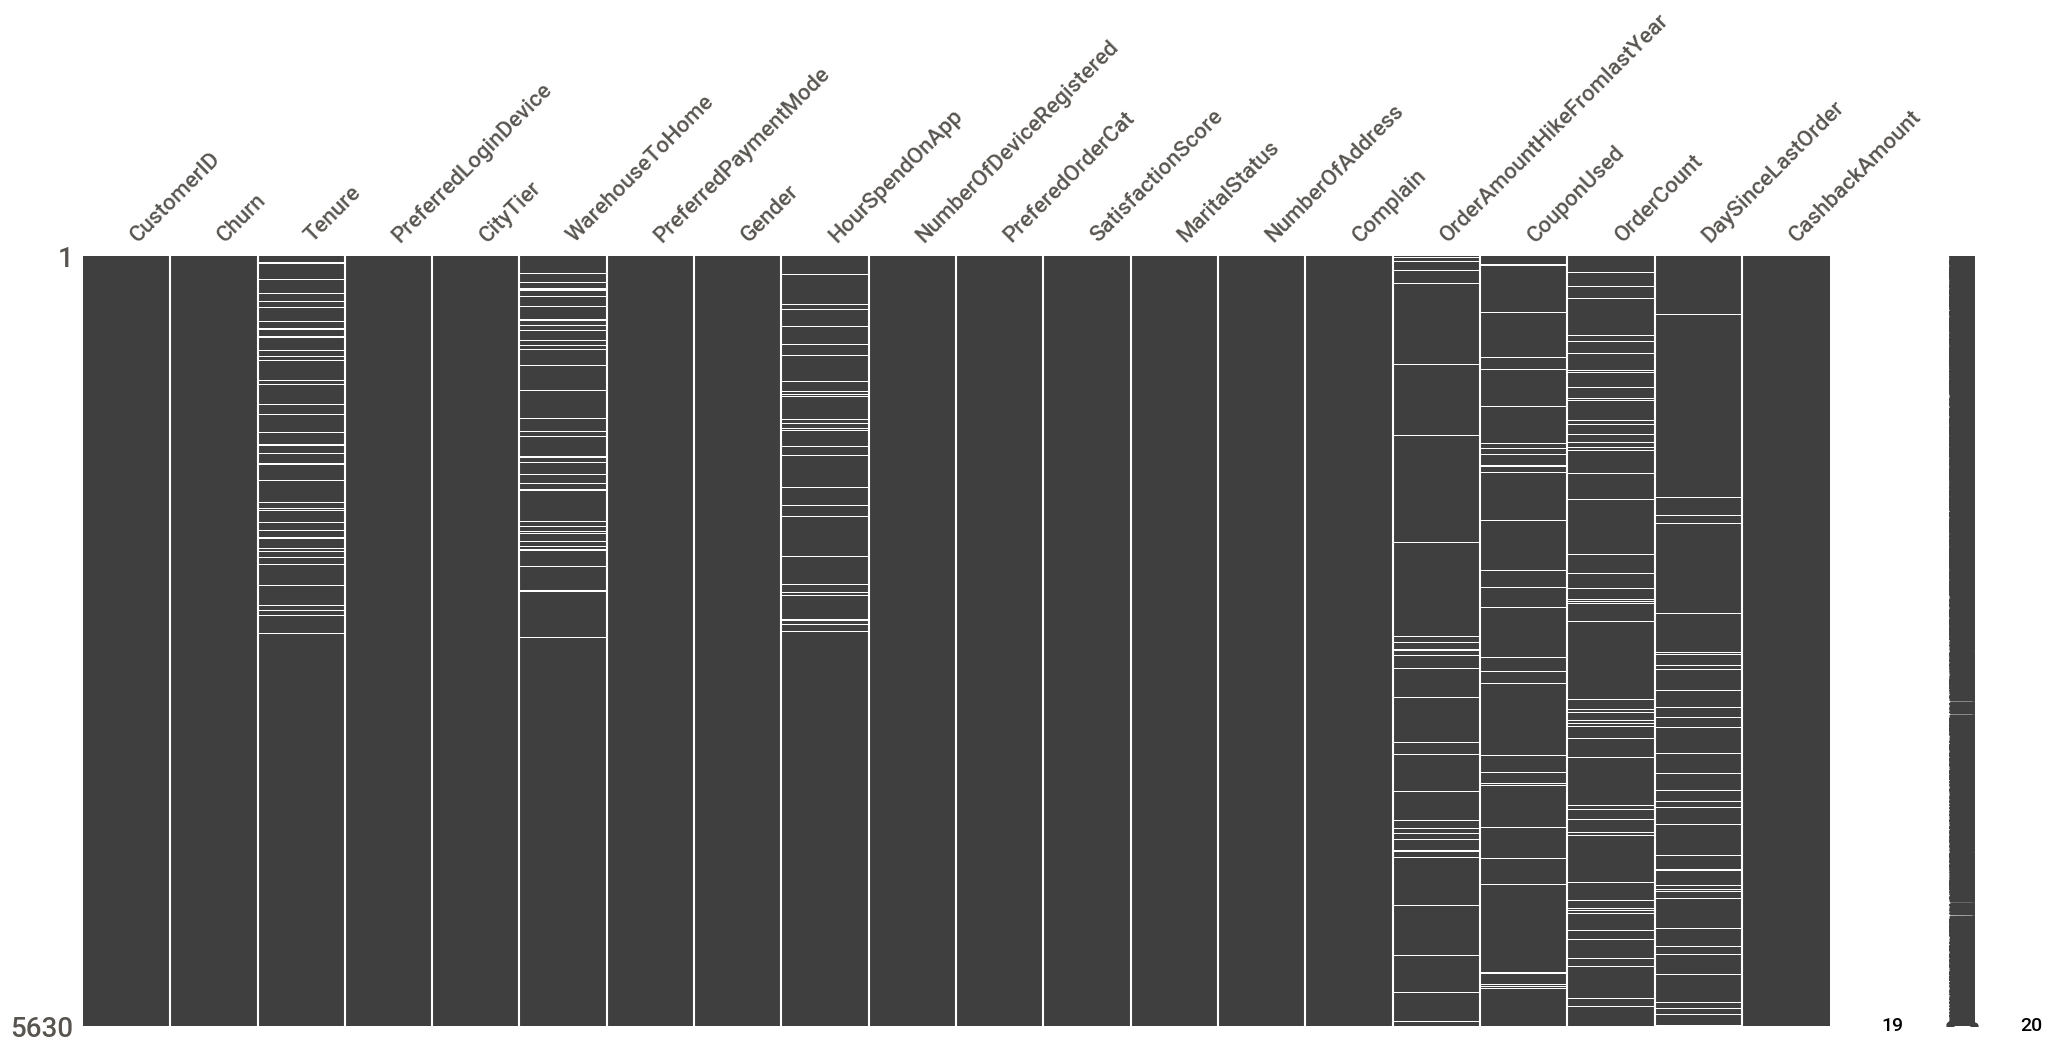

In [75]:
msno.matrix(df)

<AxesSubplot: >

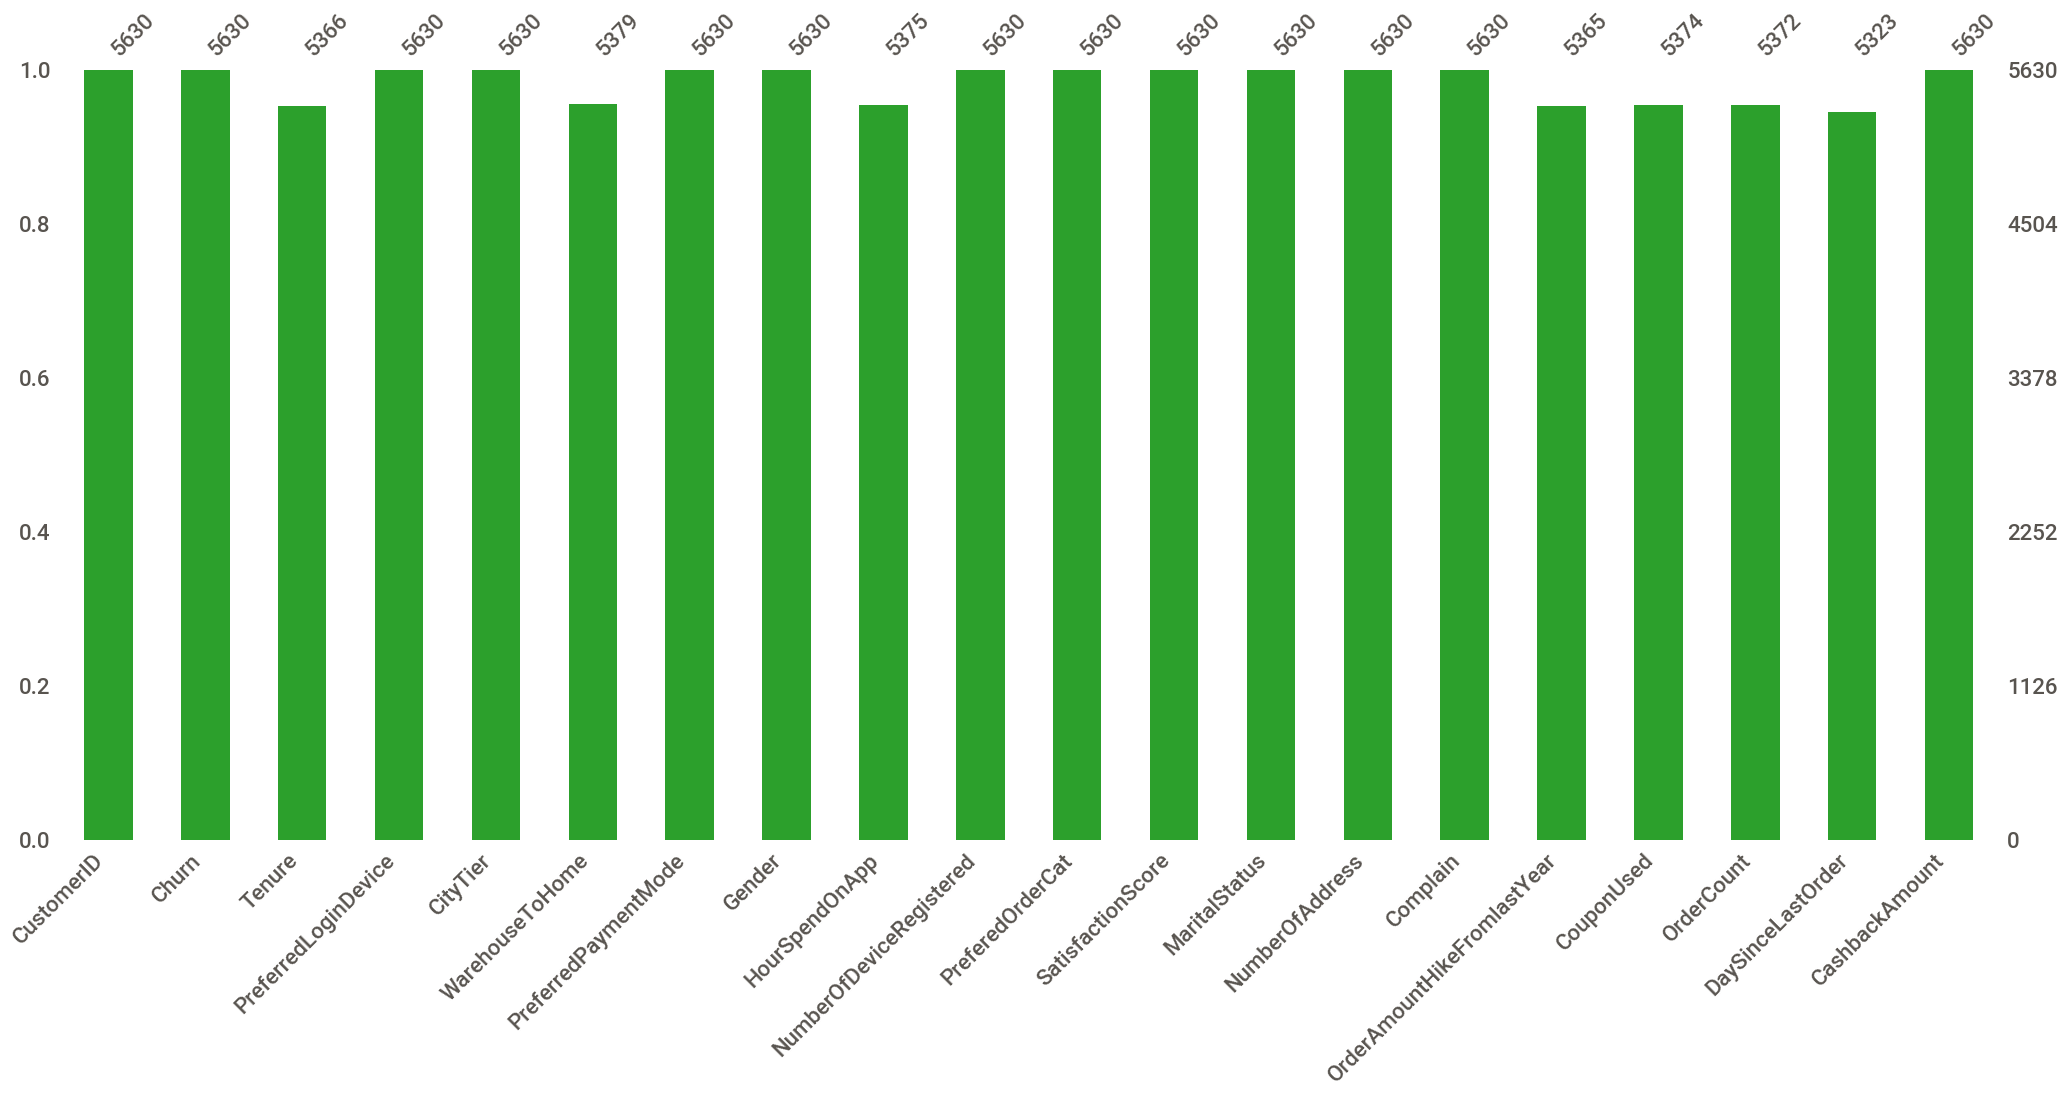

In [76]:
msno.bar(df , color="tab:green")

<AxesSubplot: xlabel='Tenure', ylabel='Density'>

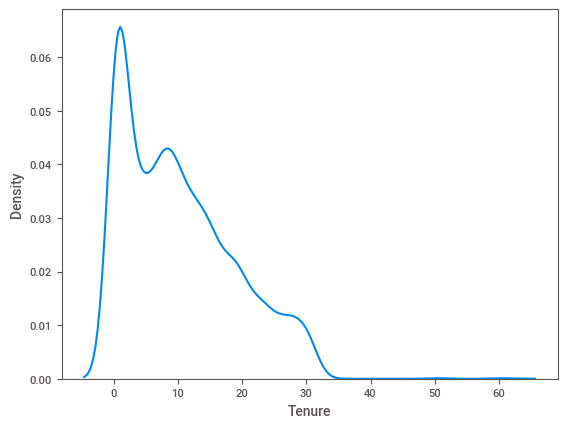

In [77]:
sns.kdeplot(df , x='Tenure')

In [78]:
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')

<AxesSubplot: xlabel='Tenure', ylabel='Density'>

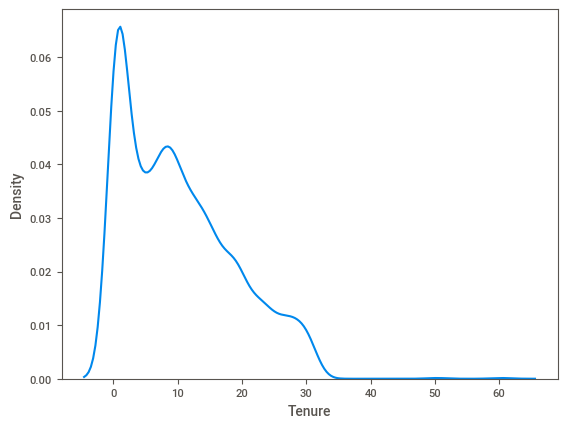

In [79]:
sns.kdeplot(df , x='Tenure')

In [80]:
df['Tenure'].isnull().sum()

0

<AxesSubplot: xlabel='WarehouseToHome', ylabel='Density'>

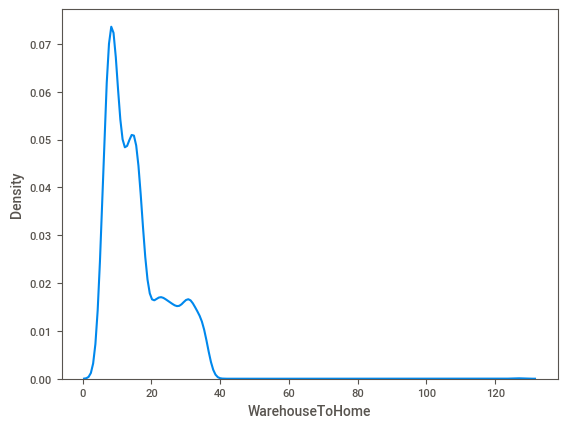

In [81]:
sns.kdeplot(df , x='WarehouseToHome')

In [82]:
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))

<AxesSubplot: xlabel='WarehouseToHome', ylabel='Density'>

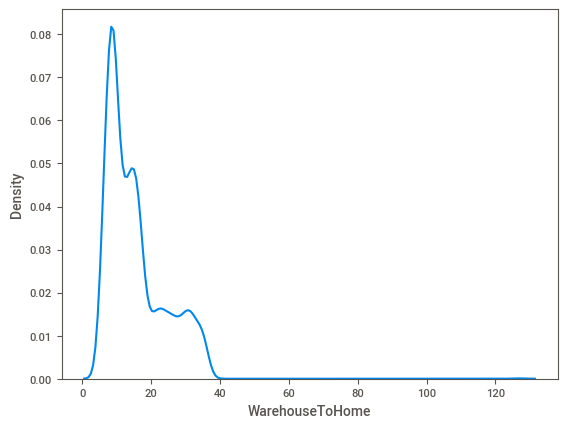

In [83]:
sns.kdeplot(df , x='WarehouseToHome')

<AxesSubplot: xlabel='HourSpendOnApp', ylabel='Density'>

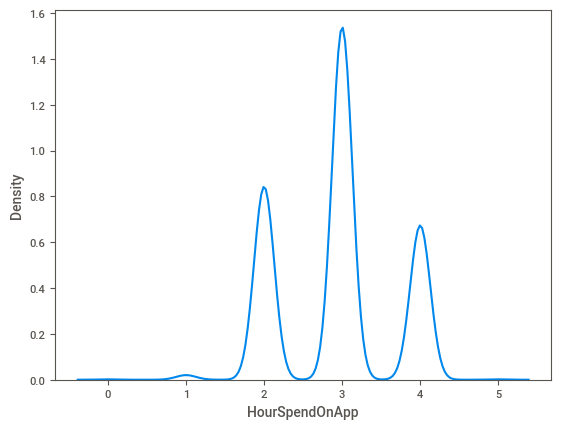

In [84]:
sns.kdeplot(df , x='HourSpendOnApp')

In [85]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))

<AxesSubplot: xlabel='HourSpendOnApp', ylabel='Density'>

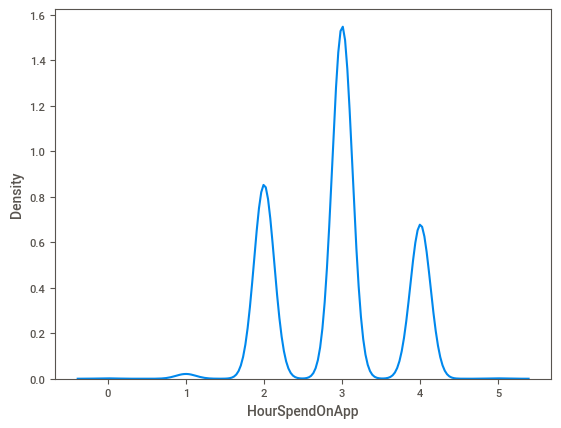

In [86]:
sns.kdeplot(df , x='HourSpendOnApp')

<AxesSubplot: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

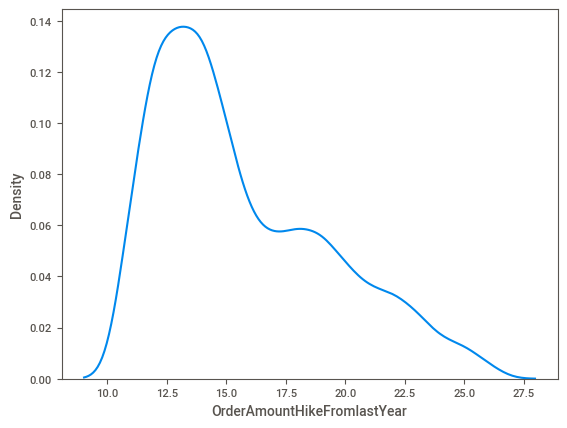

In [87]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')

In [88]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')

<AxesSubplot: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

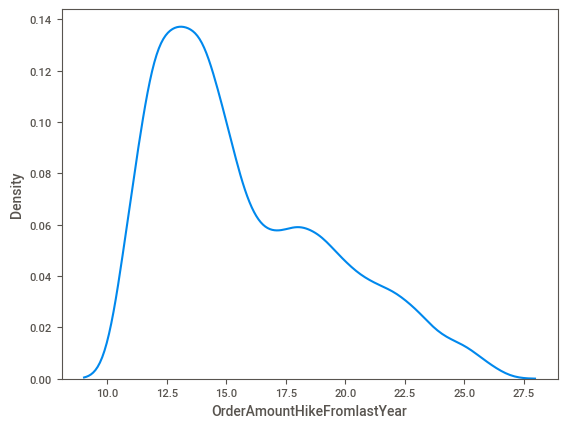

In [89]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')

<AxesSubplot: xlabel='CouponUsed', ylabel='Density'>

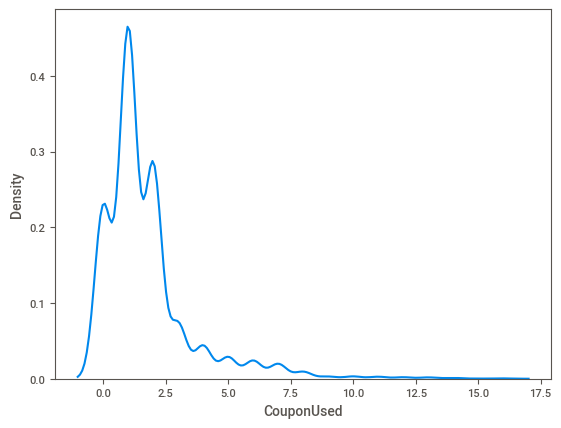

In [90]:
sns.kdeplot(df , x='CouponUsed')

In [91]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])

<AxesSubplot: xlabel='CouponUsed', ylabel='Density'>

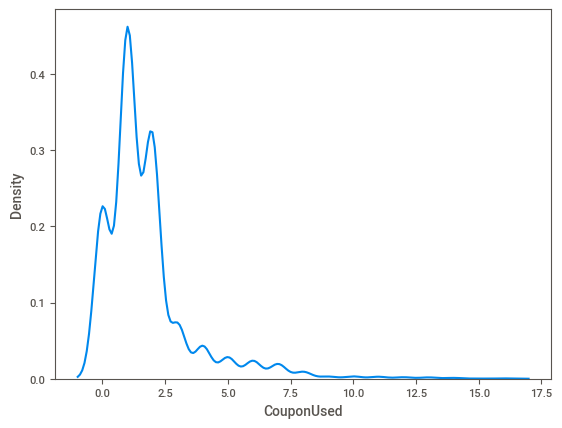

In [92]:
sns.kdeplot(df , x='CouponUsed')

<AxesSubplot: xlabel='OrderCount', ylabel='Density'>

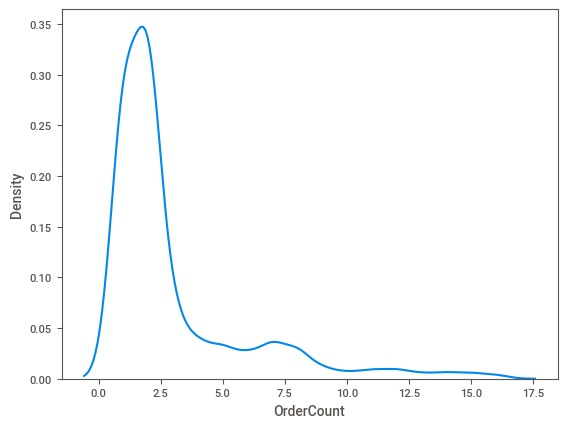

In [93]:
sns.kdeplot(df , x='OrderCount')

In [94]:
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])

<AxesSubplot: xlabel='OrderCount', ylabel='Density'>

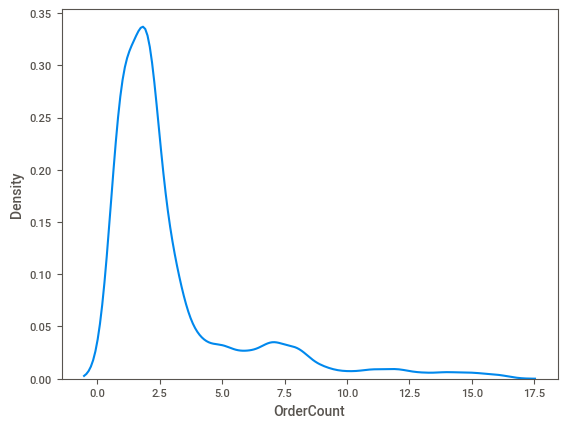

In [95]:
sns.kdeplot(df , x='OrderCount')

<AxesSubplot: xlabel='DaySinceLastOrder', ylabel='Density'>

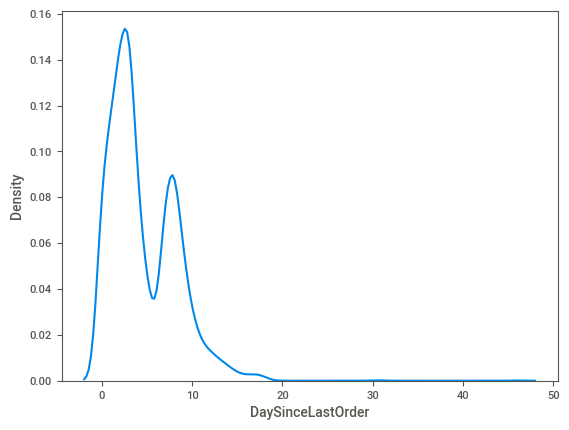

In [96]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [97]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')

<AxesSubplot: xlabel='DaySinceLastOrder', ylabel='Density'>

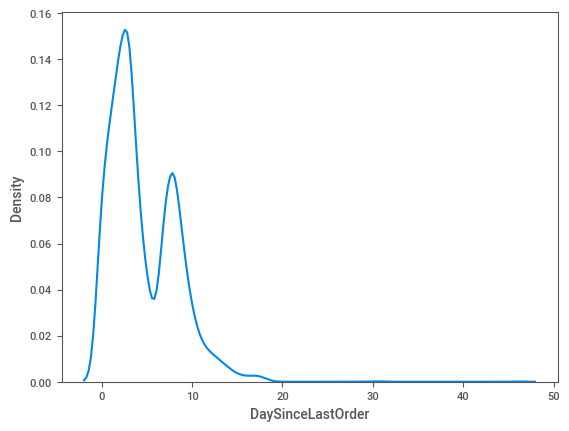

In [98]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [99]:
# After I Checked the data the Customer ID Column not important for our Models so I drop it
df.drop('CustomerID' , axis = 1 , inplace = True)

In [100]:
df.shape

(5630, 19)

Encoding

In [101]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64
****************************************
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64
****************************************
Male      3384
Female    2246
Name: Gender, dtype: int64
****************************************
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
****************************************
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
****************************************


In [102]:
data = df[df.select_dtypes(exclude=np.number).columns]
data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1            Mobile Phone                  UPI    Male        Mobile Phone   
2            Mobile Phone           Debit Card    Male        Mobile Phone   
3            Mobile Phone           Debit Card    Male  Laptop & Accessory   
4            Mobile Phone          Credit Card    Male        Mobile Phone   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

In [103]:
le = LabelEncoder()

In [104]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     1         1              8.0   
2      1     0.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07

In [105]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

PreferredLoginDevice  PreferredPaymentMode  Gender  PreferedOrderCat  \
0                     1                     2       0                 2   
1                     1                     4       1                 3   
2                     1                     2       1                 3   
3                     1                     2       1                 2   

   MaritalStatus  
0              2  
1              2  
2              2  
3              2

Handling Outliers

In [106]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int32
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int32
Gender                           int32
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int32
SatisfactionScore                int64
MaritalStatus                    int32
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

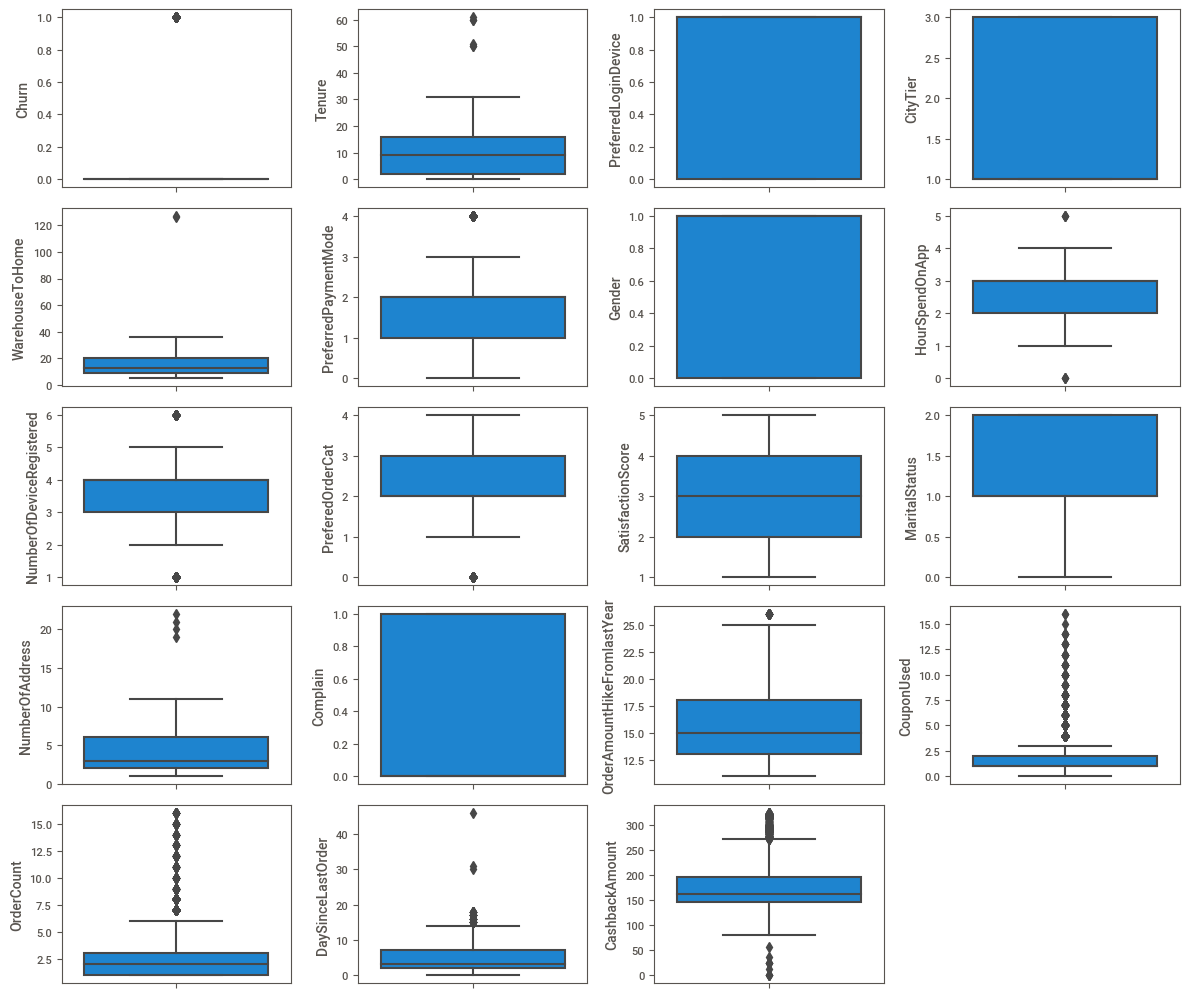

In [107]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [108]:
# detecting True Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [109]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [110]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     1         1              8.0   
2      1     0.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07

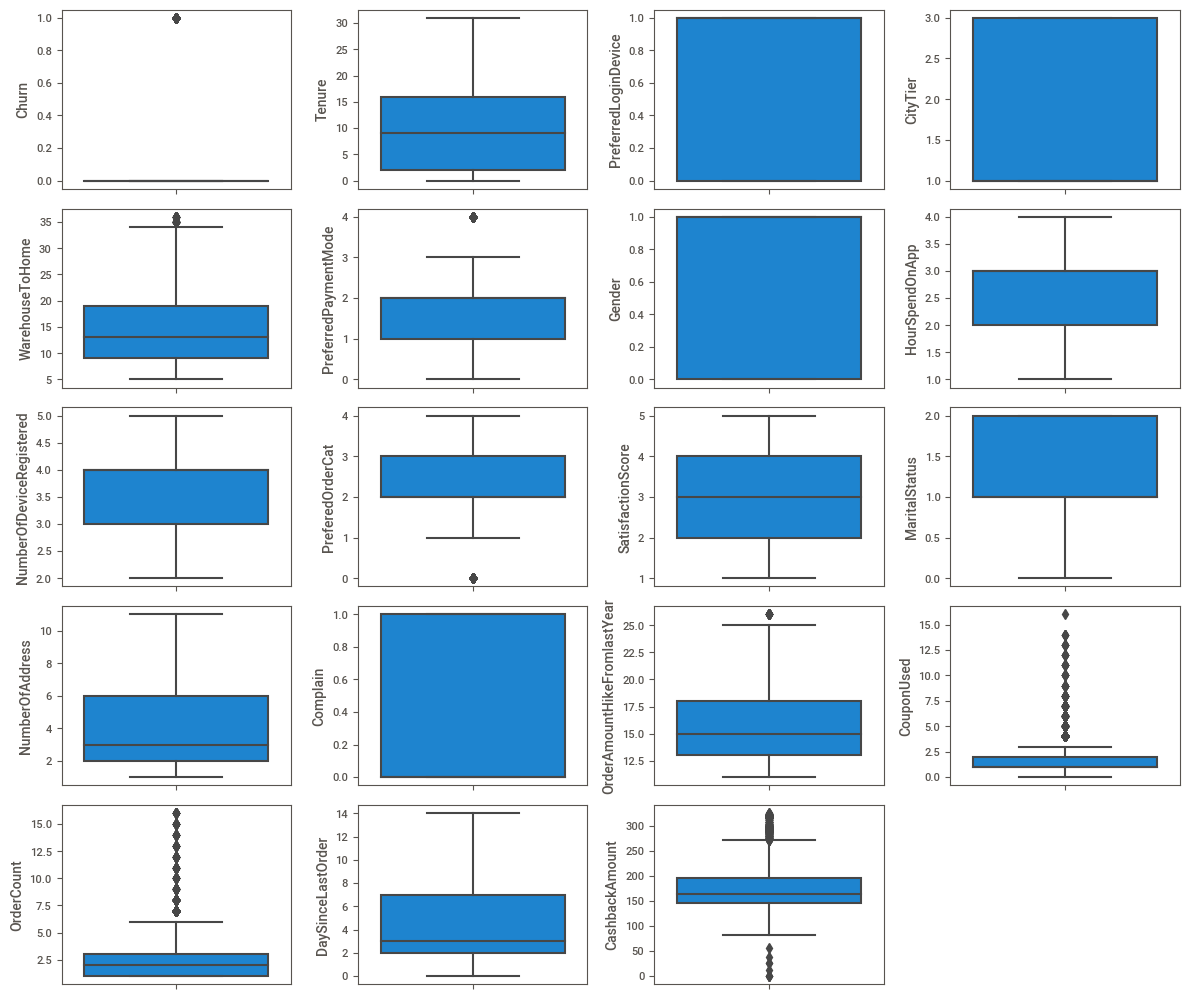

In [111]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

I performed Trim on columns containing outliers, but when I checked, I discovered that a great deal of data had been lost.

In [112]:
corr_matrix = df.corr()
corr_matrix

Churn    Tenure  PreferredLoginDevice  \
Churn                        1.000000 -0.336058             -0.041250   
Tenure                      -0.336058  1.000000              0.034596   
PreferredLoginDevice        -0.041250  0.034596              1.000000   
CityTier                     0.069595 -0.065933              0.010097   
WarehouseToHome              0.054768 -0.011849             -0.015852   
PreferredPaymentMode        -0.005156 -0.016797              0.009610   
Gender                       0.038193 -0.054684             -0.012892   
HourSpendOnApp              -0.002469 -0.008209              0.018495   
NumberOfDeviceRegistered     0.079116 -0.019592             -0.005323   
PreferedOrderCat             0.105149 -0.180637              0.005137   
SatisfactionScore            0.108600 -0.013331              0.037642   
MaritalStatus                0.131982 -0.111074             -0.020207   
NumberOfAddress              0.033703  0.240939              0.033310   
Complain                     0.252346 -0.023903              0.005983   
OrderAmountHikeFromlastYear -0.002545  0.017177             -0.005296   
CouponUsed                  -0.017914  0.127314             -0.015940   
OrderCount                  -0.036568  0.181138             -0.021975   
DaySinceLastOrder           -0.164448  0.164444             -0.027906   
CashbackAmount              -0.165008  0.453981              0.042321   

                             CityTier  WarehouseToHome  PreferredPaymentMode  \
Churn                        0.069595         0.054768             -0.005156   
Tenure                      -0.065933        -0.011849             -0.016797   
PreferredLoginDevice         0.010097        -0.015852              0.009610   
CityTier                     1.000000         0.014636              0.251539   
WarehouseToHome              0.014636         1.000000              0.008046   
PreferredPaymentMode         0.251539         0.008046              1.000000   
Gender                      -0.022759        -0.015904              0.020086   
HourSpendOnApp              -0.009977         0.079556             -0.007567   
NumberOfDeviceRegistered     0.007282         0.029049              0.012908   
PreferedOrderCat            -0.164040        -0.114357             -0.030738   
SatisfactionScore           -0.009735         0.013783             -0.018085   
MaritalStatus                0.002254        -0.028226             -0.024158   
NumberOfAddress             -0.033363         0.001173              0.003223   
Complain                     0.006312         0.022052              0.028288   
OrderAmountHikeFromlastYear -0.022135         0.028927             -0.000268   
CouponUsed                   0.017139         0.013175             -0.008582   
OrderCount                   0.035656         0.016235             -0.039249   
DaySinceLastOrder            0.023394         0.044883             -0.003581   
CashbackAmount               0.044946         0.036318              0.034381   

                               Gender  HourSpendOnApp  \
Churn                        0.038193       -0.002469   
Tenure                      -0.054684       -0.008209   
PreferredLoginDevice        -0.012892        0.018495   
CityTier                    -0.022759       -0.009977   
WarehouseToHome             -0.015904        0.079556   
PreferredPaymentMode         0.020086       -0.007567   
Gender                       1.000000       -0.018168   
HourSpendOnApp              -0.018168        1.000000   
NumberOfDeviceRegistered    -0.020954        0.273310   
PreferedOrderCat             0.060969        0.027323   
SatisfactionScore           -0.037348        0.029917   
MaritalStatus               -0.019975       -0.045707   
NumberOfAddress             -0.030577        0.142877   
Complain                    -0.030350       -0.004080   
OrderAmountHikeFromlastYear -0.007694        0.100928   
CouponUsed                  -0.026477        0.183676   
O

<AxesSubplot: >

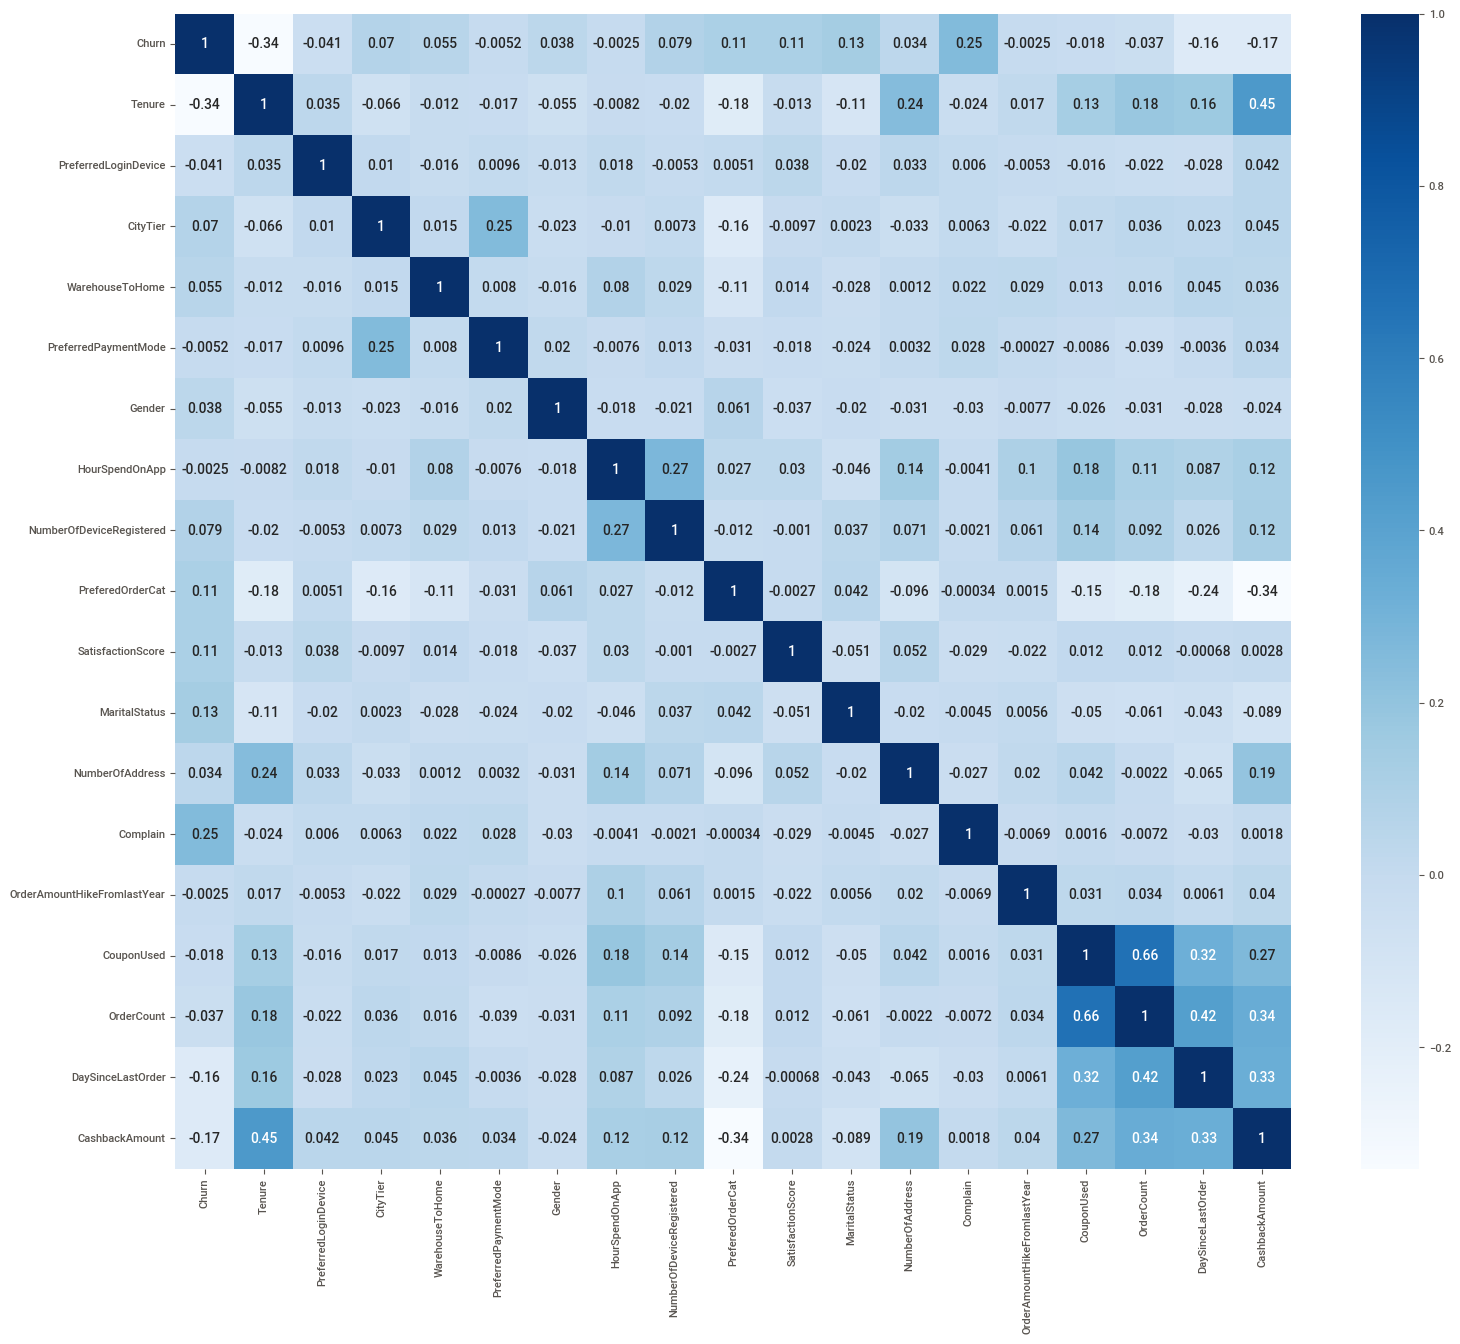

In [113]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [114]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.252346
MaritalStatus                  0.131982
SatisfactionScore              0.108600
PreferedOrderCat               0.105149
NumberOfDeviceRegistered       0.079116
CityTier                       0.069595
WarehouseToHome                0.054768
Gender                         0.038193
NumberOfAddress                0.033703
HourSpendOnApp                -0.002469
OrderAmountHikeFromlastYear   -0.002545
PreferredPaymentMode          -0.005156
CouponUsed                    -0.017914
OrderCount                    -0.036568
PreferredLoginDevice          -0.041250
DaySinceLastOrder             -0.164448
CashbackAmount                -0.165008
Tenure                        -0.336058
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

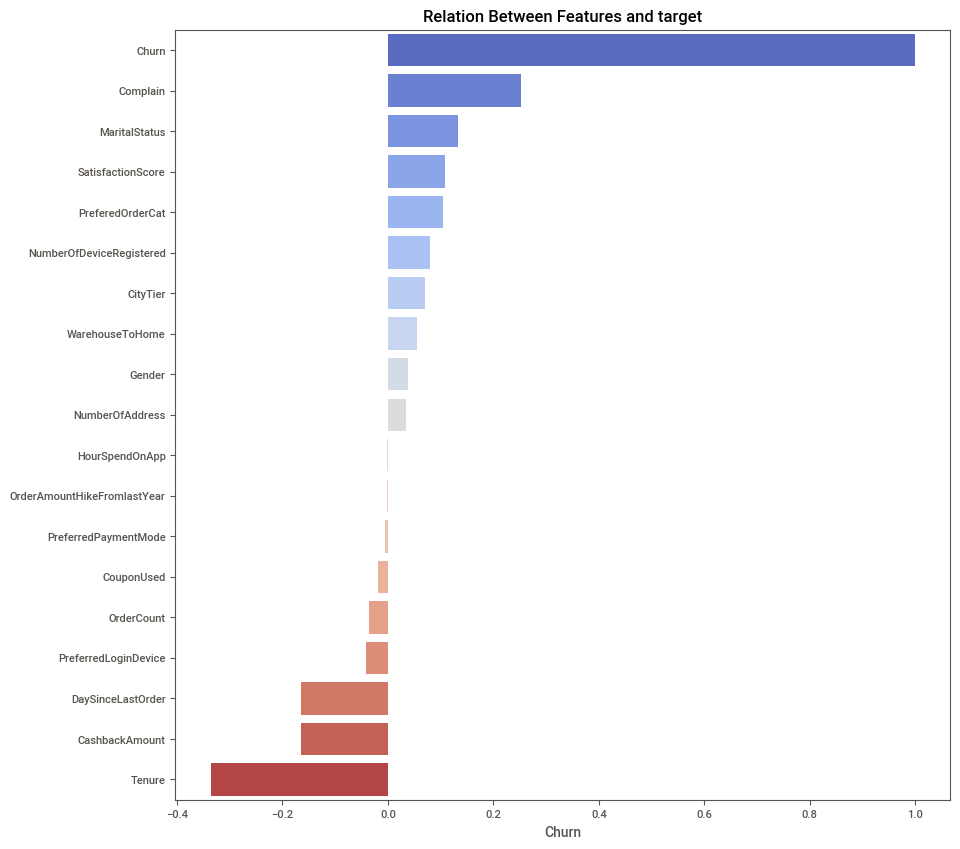

In [115]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

In [116]:
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

Handling Imbalancd Data

In [117]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [118]:
from imblearn.combine import SMOTETomek

In [119]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

In [120]:
x_over.shape, y_over.shape

((8582, 18), (8582,))

Split Data

In [121]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [122]:
# Now I will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
# SC = StandardScaler()
# Rb = RobustScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

Modelling

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")

In [124]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()

In [125]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [126]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7689362410521059
Test Score: 0.7724271844660194
Acc Train: 0.7689362410521059
Acc Test: 0.7724271844660194
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.9061095388713168
Test Score: 0.88
Acc Train: 0.9061095388713168
Acc Test: 0.88
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9359223300970874
Acc Train: 1.0
Acc Test: 0.9359223300970874
                                                            
************************************************************
                                                            
Using model: Random Forest
Trainnin

In [127]:
all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

Train_Accuarcy  Test_Accuarcy
Logistic Regression           0.768936       0.772427
Support Vector Machine        0.906110       0.880000
Decision Tree                 1.000000       0.935922
Random Forest                 1.000000       0.968155
XGBClassifier                 1.000000       0.961553
AdaBoostClassifier            0.875479       0.841553

In [128]:
# Models vs Train Accuracies
fig = px.bar(all_models, x=all_models['Train_Accuarcy'], y = all_models.index ,color=all_models['Train_Accuarcy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Sccracy',
yaxis_title='Models Names',
)
fig.show()


# Models vs Test Accuracies
fig = px.bar(all_models, x=all_models['Test_Accuarcy'], y = all_models.index ,color=all_models['Test_Accuarcy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuarcy',
yaxis_title='Models Names',
)
fig.show()

In [129]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

Accuracy = 0.7724271844660194
ROC Area under Curve = 0.7720973355635528
              precision    recall  f1-score   support

           0    0.77841   0.75138   0.76466      1267
           1    0.76701   0.79281   0.77970      1308

    accuracy                        0.77243      2575
   macro avg    0.77271   0.77210   0.77218      2575
weighted avg    0.77262   0.77243   0.77230      2575

**********************************************************************


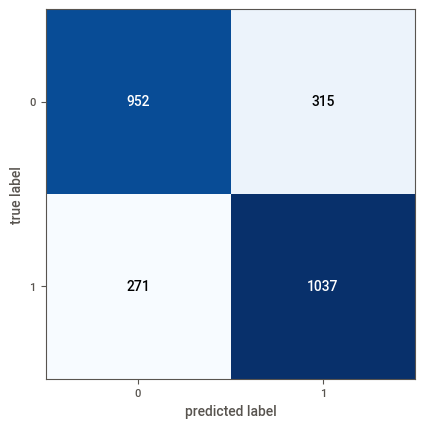

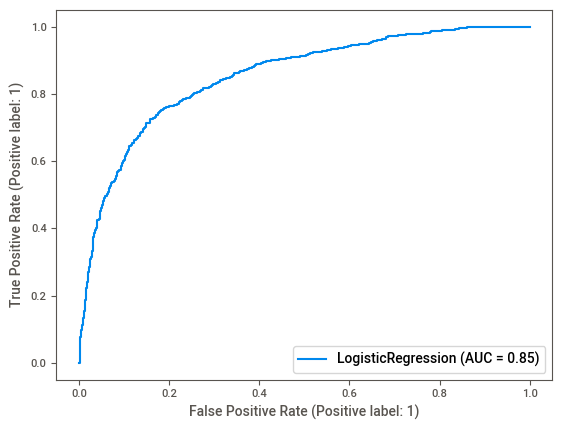

In [130]:
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.88
ROC Area under Curve = 0.8797407249178752
              precision    recall  f1-score   support

           0    0.88943   0.86346   0.87625      1267
           1    0.87138   0.89602   0.88353      1308

    accuracy                        0.88000      2575
   macro avg    0.88040   0.87974   0.87989      2575
weighted avg    0.88026   0.88000   0.87995      2575



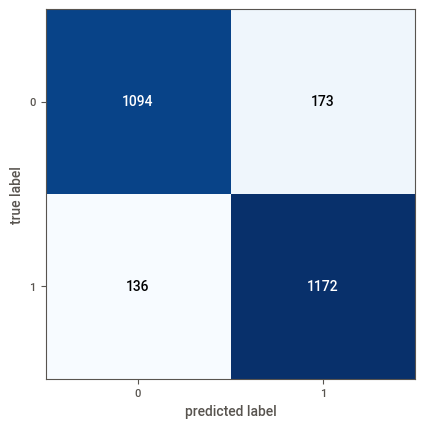

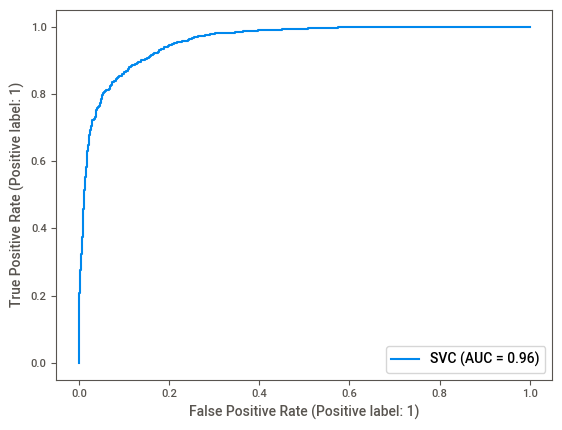

In [131]:
model=SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc2))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9347572815533981
ROC Area under Curve = 0.9345922970536483
              precision    recall  f1-score   support

           0    0.94208   0.92423   0.93307      1267
           1    0.92793   0.94495   0.93636      1308

    accuracy                        0.93476      2575
   macro avg    0.93500   0.93459   0.93472      2575
weighted avg    0.93489   0.93476   0.93474      2575



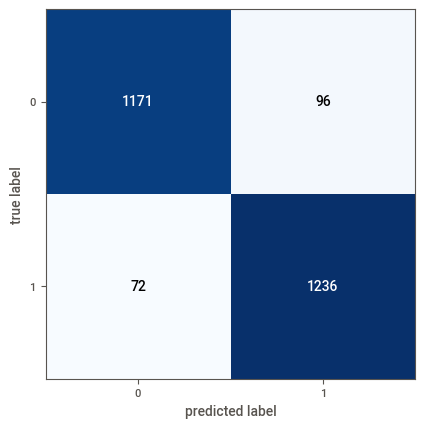

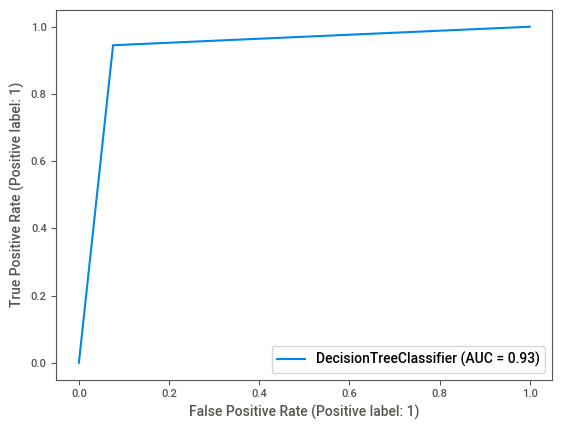

In [132]:
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9677669902912621
ROC Area under Curve = 0.9674681216193709
              precision    recall  f1-score   support

           0    0.98525   0.94870   0.96663      1267
           1    0.95203   0.98624   0.96883      1308

    accuracy                        0.96777      2575
   macro avg    0.96864   0.96747   0.96773      2575
weighted avg    0.96837   0.96777   0.96775      2575



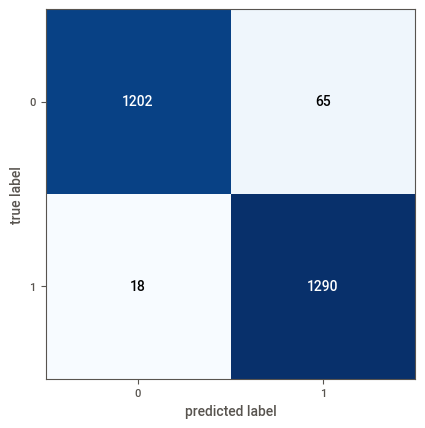

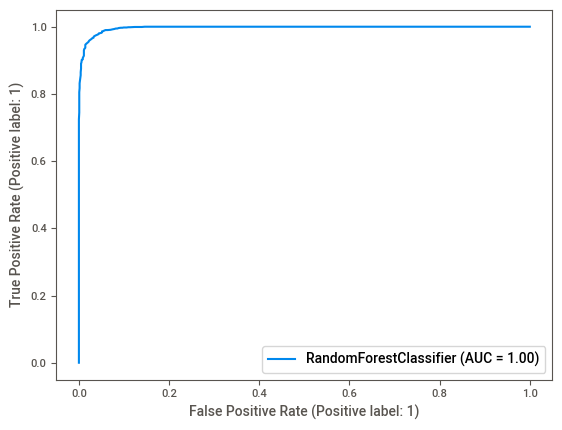

In [133]:
model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9615533980582525
ROC Area under Curve = 0.9609808138370153
              precision    recall  f1-score   support

           0    0.99660   0.92502   0.95948      1267
           1    0.93209   0.99694   0.96343      1308

    accuracy                        0.96155      2575
   macro avg    0.96435   0.96098   0.96145      2575
weighted avg    0.96383   0.96155   0.96148      2575



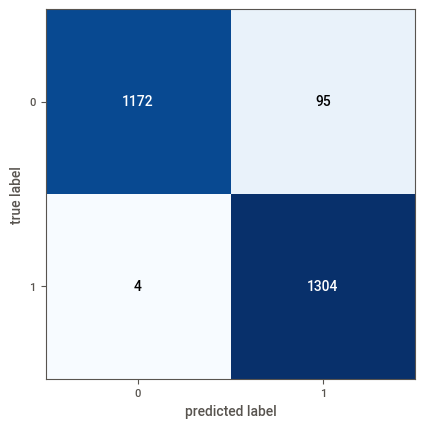

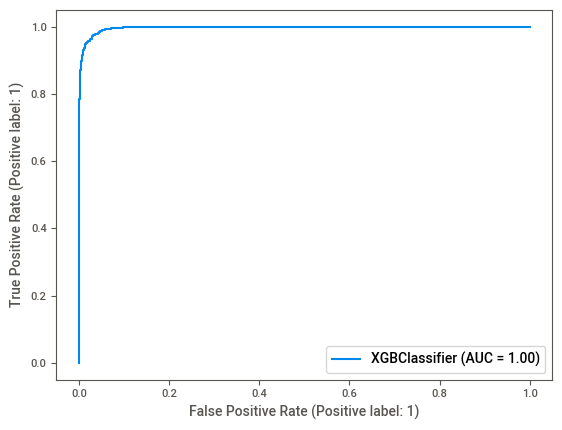

In [134]:
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8415533980582525
ROC Area under Curve = 0.840535988839248
              precision    recall  f1-score   support

           0    0.88729   0.77664   0.82828      1267
           1    0.80696   0.90443   0.85292      1308

    accuracy                        0.84155      2575
   macro avg    0.84712   0.84054   0.84060      2575
weighted avg    0.84648   0.84155   0.84080      2575



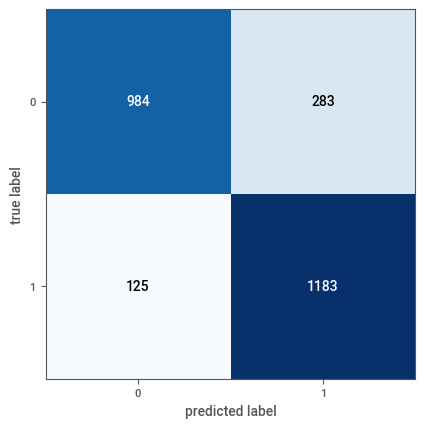

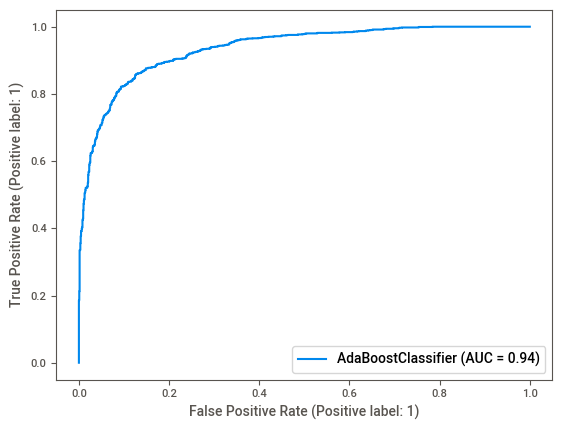

In [135]:
model=AdaBoostClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc6 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc6))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Auto ML

In [136]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'